In [50]:
import pandas as pd

In [51]:
energy_consumption = pd.read_table("platform_energy_results.txt", delim_whitespace=True, header=0, na_values=-1)
energy_consumption.head()

,client_gRPC,client_RPC,client_Rest,server_gRPC,server_RPC,server_Rest
0,502.9,1054.1,2281.8,675.3,1013.1,1888.7
1,434.6,389.5,418.2,412.1,381.3,405.1
2,821.3,1471.9,1654.4,846.1,1391.2,1659.1
3,110.8,220.4,352.5,95.1,181.7,321.3
4,7295.3,2030.4,22261.4,12900.2,2544.0,36048.6


In [52]:
energy_consumption.describe()

,client_gRPC,client_RPC,client_Rest,server_gRPC,server_RPC,server_Rest
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1576.828571,1222.114286,5482.871429,2358.757143,1264.314286,7848.328571
std,2540.772161,700.936867,7969.202997,4656.163730,823.648192,13153.201375
min,110.800000,220.400000,352.500000,95.100000,181.700000,321.300000
25%,468.750000,721.800000,1036.300000,543.700000,697.200000,1032.100000
50%,806.100000,1471.900000,2281.800000,731.200000,1391.200000,1888.700000
75%,944.050000,1694.250000,5705.900000,848.700000,1669.450000,7307.750000
max,7295.300000,2030.400000,22261.400000,12900.200000,2544.000000,36048.600000


In [53]:
energy_consumption.quantile([0.05, 0.95])

,client_gRPC,client_RPC,client_Rest,server_gRPC,server_RPC,server_Rest
0.05,207.94,271.13,372.21,190.20,241.58,346.44
0.95,5426.75,1982.13,18302.21,9285.53,2339.16,29018.31


In [54]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, h, m-h, m+h

In [55]:
energy_consumption.apply(lambda x: mean_confidence_interval(x.dropna()), axis=0)

client_gRPC    (1576.8285714285714, 2349.822327970614, -772.9...
client_RPC     (1222.1142857142856, 648.2584806006938, 573.85...
client_Rest    (5482.8714285714295, 7370.283502073102, -1887....
server_gRPC    (2358.7571428571428, 4306.233224918046, -1947....
server_RPC     (1264.314285714286, 761.7475280724065, 502.566...
server_Rest    (7848.328571428569, 12164.682357130021, -4316....
dtype: object

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
melted_df = energy_consumption.melt(var_name ='Protocols', value_name ='Energy consumption (in Joules)')
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,client_gRPC,502.9
1,client_gRPC,434.6
2,client_gRPC,821.3
3,client_gRPC,110.8
4,client_gRPC,7295.3


In [58]:
melted_df.rename({1: 'protocols'}, axis='columns', inplace=True)
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,client_gRPC,502.9
1,client_gRPC,434.6
2,client_gRPC,821.3
3,client_gRPC,110.8
4,client_gRPC,7295.3


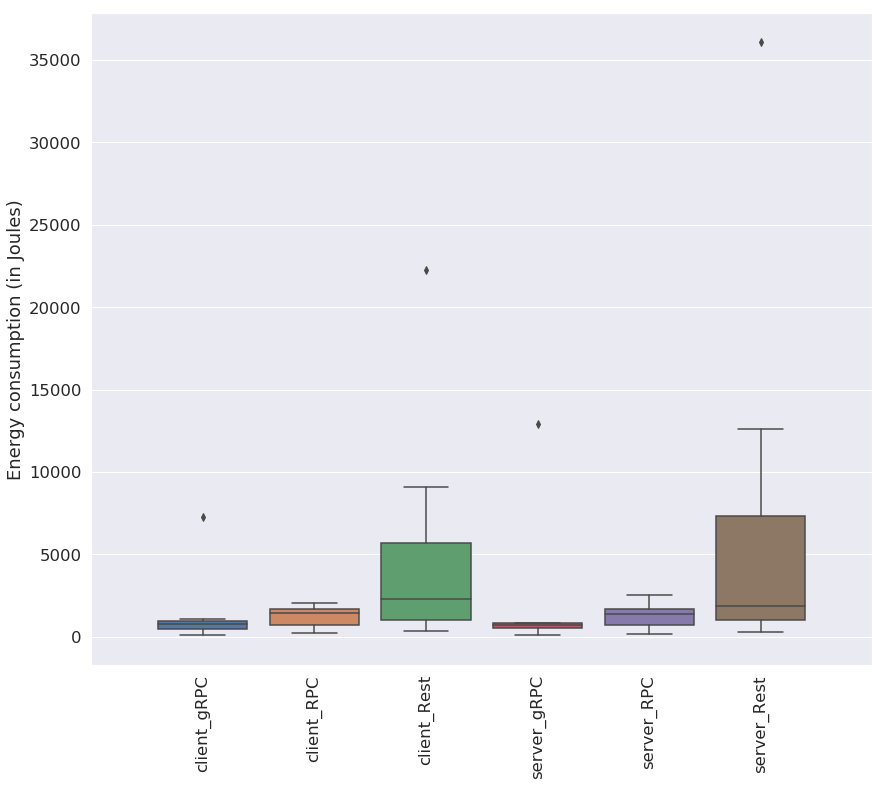

In [60]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="Protocols", y="Energy consumption (in Joules)", data=melted_df, showfliers=True)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()
g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
fig.savefig('platform_energy_with_outliers.pdf', bbox_inches='tight')